# <font color='red'>Cauê Citrini Lacava e Gianluca Formicula</font>

___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

(array([ 172.,  152.,  168.,  174.,  176.,  158.]),
 array([ 1.        ,  1.83333333,  2.66666667,  3.5       ,  4.33333333,
         5.16666667,  6.        ]),
 <a list of 6 Patch objects>)

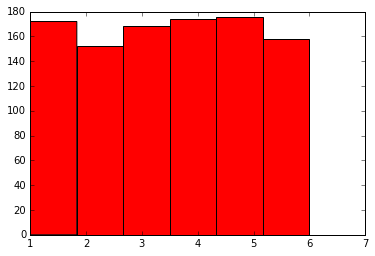

In [6]:
xs = randint(1,7,size=1000)

plt.hist(xs, bins=6, color="red")

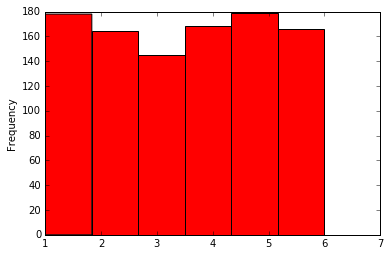

In [3]:
x = pd.Series(randint(1,7,size=1000))

plot = x.plot.hist(bins=6, color="red")

B) As frequências de cada face não condizem exatamente com as probabilidades teóricas, porque as probabilidades representam a chance de que o evento ocorra diante das opções verificadas, e na prática nem sempre a probabilidade relata exatamente o ocorrido, mas traz uma aproximação bastante satisfatória como visto acima.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [4]:
deu_7 = 0
nao_deu = 0
for i in range(1001):
    dado1 = randint(1,7,1)
    dado2 = randint(1,7,1)
    soma = dado1 + dado2
    if soma == 7:
        deu_7 += 1
    elif soma != 7:
        nao_deu += 1
    soma = 0
    
print("A)")
p7 = (deu_7/1000)
print(p7)
pn = (nao_deu/1000)
print(pn)

A)
0.154
0.847


B) Os resultados serão iguais, devido ao fato de o lançamento do primeiro dado não alterar a em nada o lançamento do segundo.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [7]:
ganha_se_trocar = 0
perde_se_trocar = 0

vezes = 100001

for i in range(vezes):
    premiada = randint(1,4)
    escolhida = randint(1,4)
    
    if premiada == 1:
        if escolhida == 1:
            perde_se_trocar += 1
        elif escolhida == 2:
            ganha_se_trocar += 1
        elif escolhida == 3:
            ganha_se_trocar += 1
            
    if premiada == 2:
        if escolhida == 1:
            ganha_se_trocar += 1
        elif escolhida == 2:
            perde_se_trocar += 1
        elif escolhida == 3:
            ganha_se_trocar += 1
    
    if premiada == 3:
        if escolhida == 1:
            ganha_se_trocar += 1
        elif escolhida == 2:
            ganha_se_trocar += 1
        elif escolhida == 3:
            perde_se_trocar += 1

prob_troca = ganha_se_trocar/vezes
print(prob_troca)
prob_fica = perde_se_trocar/vezes
print(prob_fica)

0.6672433275667243
0.33275667243327567


Inicialmente a probabilidade de acertar a porta premiada é de 1/3 e as outras duas somam a probabilidade de 2/3 de estarem premiadas, no segundo momento o locutor abrira uma das portas não premiada, portanto a que restou somara 2/3 da probabilidade de estar premiada, desta forma trocar de porta no segundo momento sempre resultara no dobro de chance de acertar a porta premiada.